In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import librosa
import librosa.display
from IPython.display import Audio

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load and Analysis the dataset

In [2]:
paths=[]
labels=[]
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label=filename.split('_')[-1]
        label=label.split('.')[0]
        labels.append(label.lower())

In [3]:
type(paths)

list

In [4]:
paths[:5]

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav']

In [5]:
type(labels)

list

In [6]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [7]:
df=pd.DataFrame(list(zip(paths,labels)), columns=['Speech','label'])

In [8]:
df.shape

(5600, 2)

In [9]:
df.head(3)

,Speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear


In [10]:
df['label'].value_counts()

label
fear       800
angry      800
disgust    800
neutral    800
sad        800
ps         800
happy      800
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

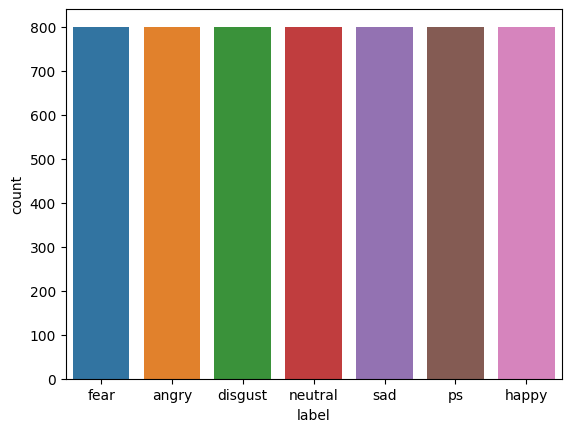

In [11]:
sns.countplot(data=df,x='label')

In [12]:
def plot_waveplot(emotion, data, sr):
    plt.title(emotion)
    plt.plot(data, color='b')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()

In [13]:
def plot_spectrogram(emotion, data, sr):
    x = librosa.stft(data)
    plt.title(emotion)
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(x), ref=np.max), sr=sr, y_axis='hz', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

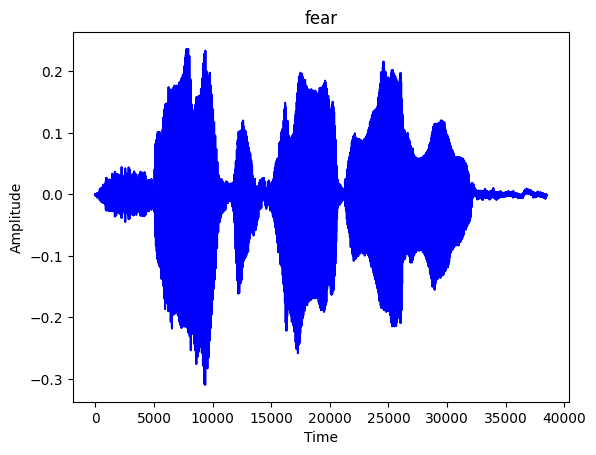

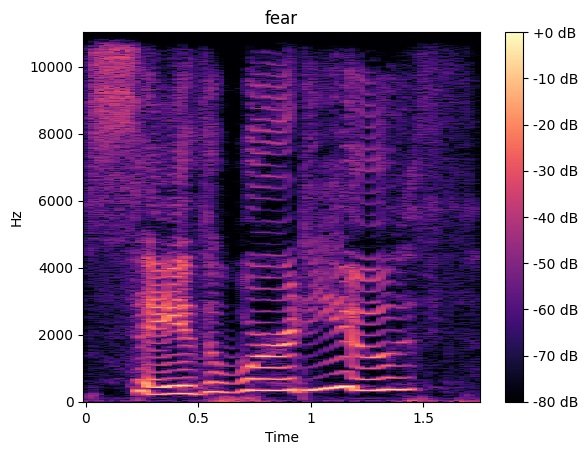

In [14]:
emotion='fear'
path=np.array(df['Speech'][df['label']==emotion])[1]
data,sr=librosa.load(path)
plot_waveplot(emotion,data,sr)
plot_spectrogram(emotion,data,sr)
Audio(path)

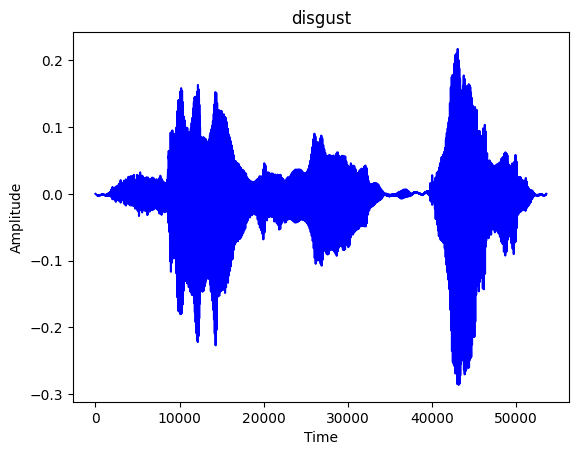

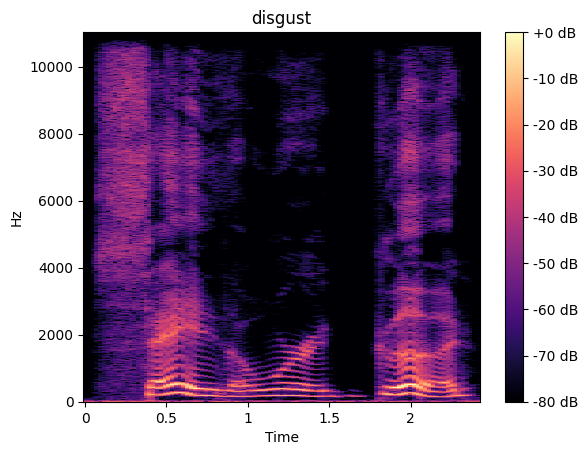

In [15]:
emotion='disgust'
path=np.array(df['Speech'][df['label']==emotion])[0]
data,sr=librosa.load(path)
plot_waveplot(emotion,data,sr)
plot_spectrogram(emotion,data,sr)
Audio(path)

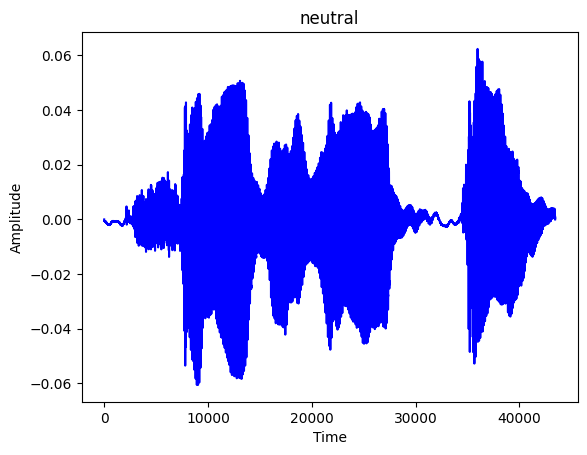

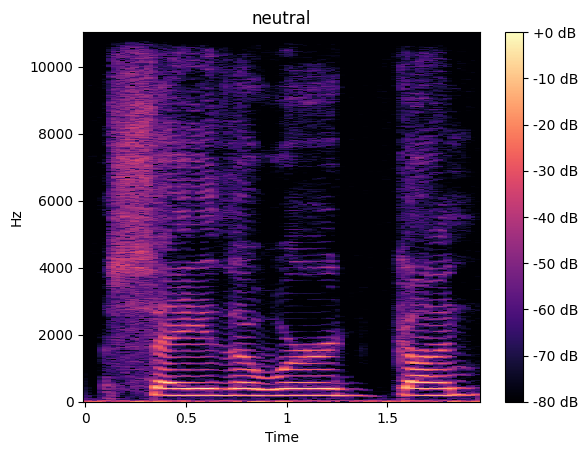

In [16]:
emotion='neutral'
path=np.array(df['Speech'][df['label']==emotion])[3]
data,sr=librosa.load(path)
plot_waveplot(emotion,data,sr)
plot_spectrogram(emotion,data,sr)
Audio(path)

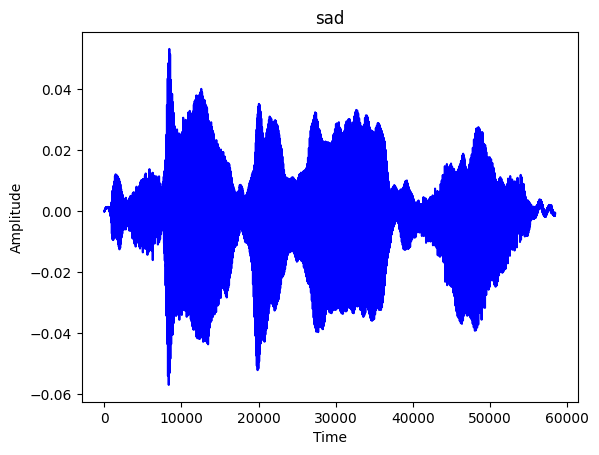

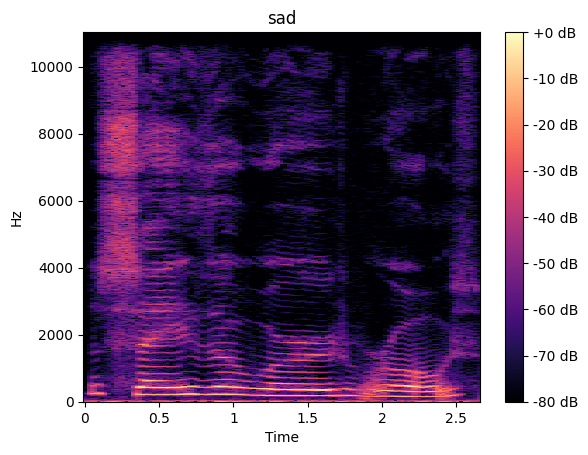

In [17]:
emotion='sad'
path=np.array(df['Speech'][df['label']==emotion])[99]
data,sr=librosa.load(path)
plot_waveplot(emotion,data,sr)
plot_spectrogram(emotion,data,sr)
Audio(path)

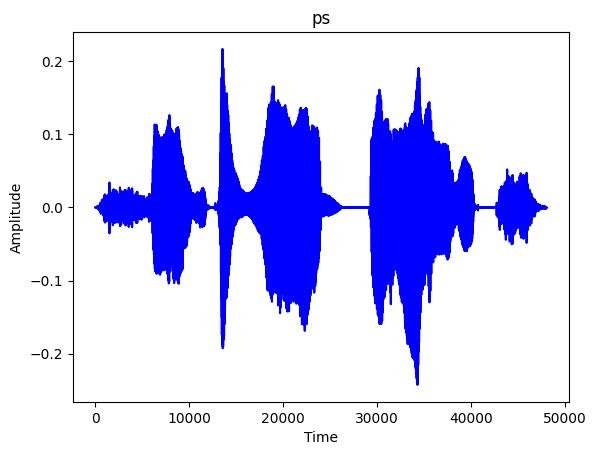

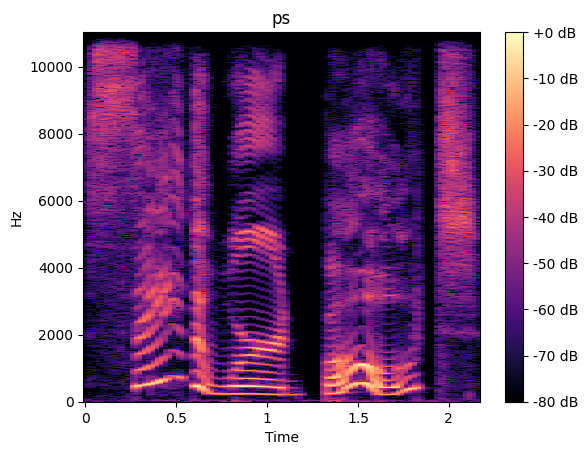

In [18]:
emotion='ps'
path=np.array(df['Speech'][df['label']==emotion])[799]
data,sr=librosa.load(path)
plot_waveplot(emotion,data,sr)
plot_spectrogram(emotion,data,sr)
Audio(path)

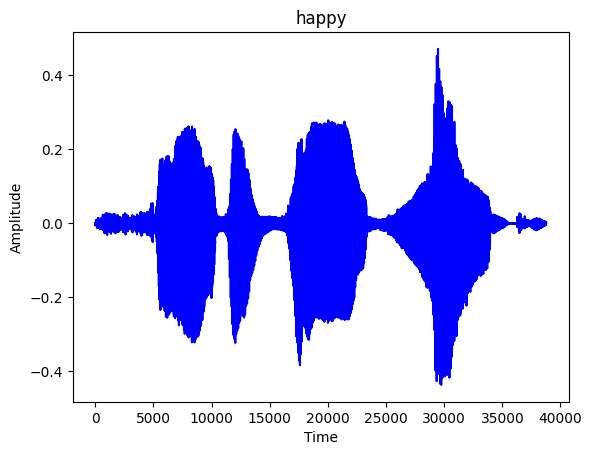

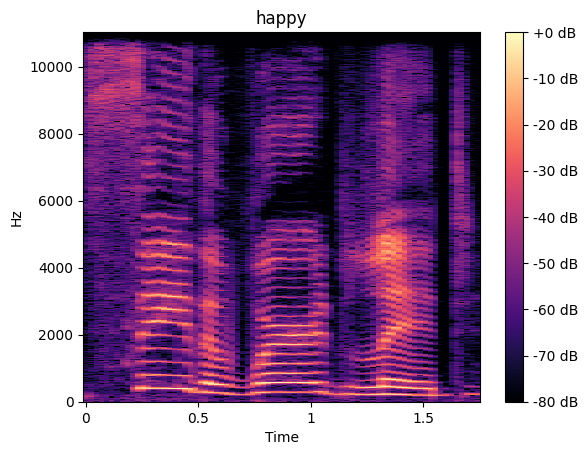

In [19]:
emotion='happy'
path=np.array(df['Speech'][df['label']==emotion])[79]
data,sr=librosa.load(path)
plot_waveplot(emotion,data,sr)
plot_spectrogram(emotion,data,sr)
Audio(path)

In [20]:
def extract_mfcc(file_name):
    y,sr=librosa.load(file_name,duration=2,offset=0.5)
    mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc

In [21]:
extract_mfcc(df['Speech'][0])

array([-285.7373    ,   85.78295   ,   -2.1689105 ,   22.125532  ,
        -14.757396  ,   11.051346  ,   12.412452  ,   -3.0002632 ,
          1.0844971 ,   11.078272  ,  -17.419662  ,   -8.093215  ,
          6.5879736 ,   -4.220953  ,   -9.15508   ,    3.521479  ,
        -13.186381  ,   14.078853  ,   19.669733  ,   22.725618  ,
         32.574642  ,   16.325031  ,   -3.8427277 ,    0.89629626,
        -11.239262  ,    6.653462  ,   -2.5883691 ,   -7.7140174 ,
        -10.941658  ,   -2.4007556 ,   -5.2812862 ,    4.2711563 ,
        -11.202216  ,   -9.024621  ,   -3.6669848 ,    4.8697433 ,
         -1.6027985 ,    2.5600505 ,   11.454375  ,   11.23345   ],
      dtype=float32)

In [22]:
extract_mfcc(df['Speech'][1])

array([-3.48343323e+02,  3.51932335e+01, -3.84132743e+00,  1.46588755e+01,
        6.42105436e+00, -7.73786604e-01, -4.09144354e+00, -7.51250267e+00,
       -2.01212730e+01,  1.18044913e+00, -1.38880415e+01,  1.45124805e+00,
       -2.75675035e+00,  2.42258763e+00,  4.35812235e-01,  2.73143792e+00,
       -1.60949039e+00,  2.09669933e+01,  6.82517910e+00,  2.08574429e+01,
        2.34099522e+01,  1.87370834e+01,  4.25021410e+00,  4.57039547e+00,
       -6.56271076e+00,  7.48917580e+00,  4.70022947e-01,  2.87454438e+00,
       -1.13248844e+01, -1.00278053e+01, -2.99417210e+00,  7.14576530e+00,
       -1.77482986e+00, -7.04389954e+00, -1.25711594e+01,  3.31683683e+00,
        1.70179522e+00, -6.45631790e-01,  3.35101277e-01,  9.38359833e+00],
      dtype=float32)

In [23]:
X_mfcc=df['Speech'].apply(lambda x:extract_mfcc(x))

In [24]:
X_mfcc

0       [-285.7373, 85.78295, -2.1689105, 22.125532, -...
1       [-348.34332, 35.193233, -3.8413274, 14.658875,...
2       [-340.11435, 53.796444, -14.267782, 20.884031,...
3       [-306.6343, 21.25971, -4.4110823, 6.4871554, -...
4       [-344.7548, 46.329193, -24.171415, 19.392921, ...
                              ...                        
5595    [-374.39523, 60.865, 0.025058376, 8.431059, -2...
5596    [-313.9648, 39.847843, -5.6493053, -3.8675752,...
5597    [-357.54886, 77.88606, -15.224756, 2.1946328, ...
5598    [-353.14743, 101.68391, -14.175895, -12.037377...
5599    [-389.4595, 54.042767, 1.3469967, -1.4258995, ...
Name: Speech, Length: 5600, dtype: object

In [25]:
type(X_mfcc)

pandas.core.series.Series

In [26]:
X=list(X_mfcc)
X=np.array(X)
X.shape

(5600, 40)

In [27]:
X=np.expand_dims(X,-1)
X.shape

(5600, 40, 1)

In [28]:
X[0]

array([[-285.7373    ],
       [  85.78295   ],
       [  -2.1689105 ],
       [  22.125532  ],
       [ -14.757396  ],
       [  11.051346  ],
       [  12.412452  ],
       [  -3.0002632 ],
       [   1.0844971 ],
       [  11.078272  ],
       [ -17.419662  ],
       [  -8.093215  ],
       [   6.5879736 ],
       [  -4.220953  ],
       [  -9.15508   ],
       [   3.521479  ],
       [ -13.186381  ],
       [  14.078853  ],
       [  19.669733  ],
       [  22.725618  ],
       [  32.574642  ],
       [  16.325031  ],
       [  -3.8427277 ],
       [   0.89629626],
       [ -11.239262  ],
       [   6.653462  ],
       [  -2.5883691 ],
       [  -7.7140174 ],
       [ -10.941658  ],
       [  -2.4007556 ],
       [  -5.2812862 ],
       [   4.2711563 ],
       [ -11.202216  ],
       [  -9.024621  ],
       [  -3.6669848 ],
       [   4.8697433 ],
       [  -1.6027985 ],
       [   2.5600505 ],
       [  11.454375  ],
       [  11.23345   ]], dtype=float32)

In [29]:
Y=pd.get_dummies(df['label']).values.astype(int)

In [30]:
Y[0:5]

array([[0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0]])

In [31]:
Y.shape

(5600, 7)

## Model building and Evolution

In [32]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [33]:
model=Sequential()
model.add(LSTM(124,input_shape=(40,1)))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7,activation='softmax'))

In [34]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 124)               62496     
                                                                 
 dense (Dense)               (None, 64)                8000      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 72,807
Trainable params: 72,807
Non-traina

In [35]:
history=model.fit(X,Y,validation_split=0.3, batch_size=32,epochs=50)

Epoch 1/50
123/123 [==============================] - 6s 12ms/step - loss: 1.0001 - accuracy: 0.6336 - val_loss: 0.4172 - val_accuracy: 0.8798
Epoch 2/50
123/123 [==============================] - 1s 7ms/step - loss: 0.3305 - accuracy: 0.8908 - val_loss: 0.2253 - val_accuracy: 0.9227
Epoch 3/50
123/123 [==============================] - 1s 8ms/step - loss: 0.2240 - accuracy: 0.9342 - val_loss: 0.1659 - val_accuracy: 0.9500
Epoch 4/50
123/123 [==============================] - 1s 8ms/step - loss: 0.1589 - accuracy: 0.9561 - val_loss: 0.0897 - val_accuracy: 0.9685
Epoch 5/50
123/123 [==============================] - 1s 8ms/step - loss: 0.1363 - accuracy: 0.9622 - val_loss: 0.1009 - val_accuracy: 0.9643
Epoch 6/50
123/123 [==============================] - 1s 7ms/step - loss: 0.1256 - accuracy: 0.9617 - val_loss: 0.0744 - val_accuracy: 0.9750
Epoch 7/50
123/123 [==============================] - 1s 7ms/step - loss: 0.0979 - accuracy: 0.9727 - val_loss: 0.2543 - val_accuracy: 0.9227
Epoch

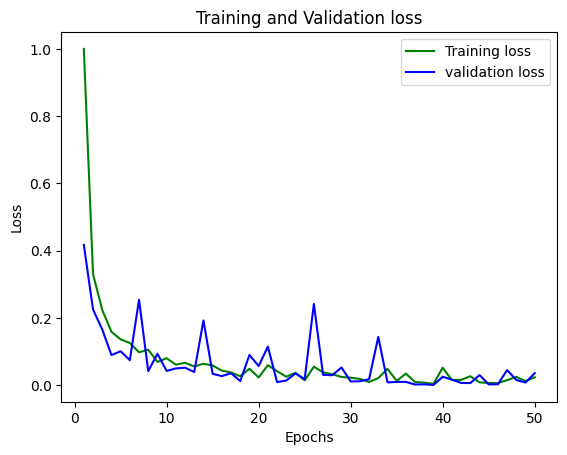

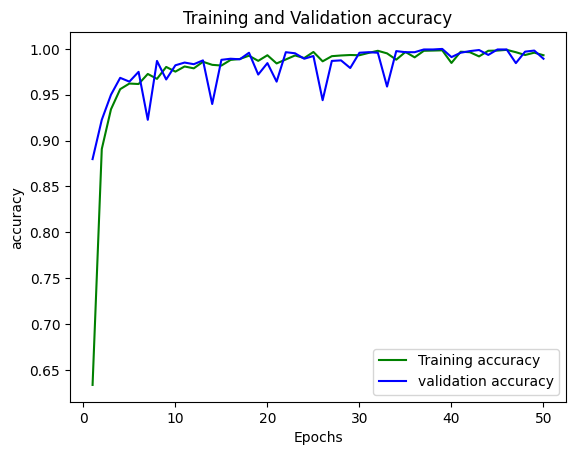

In [36]:
EPOCH=50
epochs = range(1,EPOCH+1)

loss_train = history.history['loss']
loss_val = history.history['val_loss']
Acc_train = history.history['accuracy']
Acc_val =history.history['val_accuracy']

# Loss Vs Epochs
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy Vs Epochs
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
-Train and validation accuracy and loss seems to converge.